## **Optimizing User Engagement: A/B Testing the Impact of Website Background Color**

**Problem Statement:**

The retail company wants to determine whether changing the website background color from **White (Group A - Control) to Black (Group B - Treatment)** improves user engagement. User engagement is measured by:

**Page Views**: Number of pages viewed during a session.

**Time Spent**: Total time spent on the website during a session.

**Conversion**: Whether the user completed a desired action (e.g., purchase, sign-up).

The goal is to analyze the dataset and determine if the new background color (Black) leads to a statistically significant improvement in user engagement compared to the default color (White).

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('ab_testing.csv')

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())




First few rows of the dataset:
   User ID Group  Page Views  Time Spent Conversion   Device          Location
0    14292     B           3         424         No   Mobile  Northern Ireland
1    11682     A           9         342         No   Mobile          Scotland
2    19825     A           2         396         No  Desktop  Northern Ireland
3    16080     B           4         318         No  Desktop             Wales
4    18851     A           1         338        Yes  Desktop          Scotland

Missing values in the dataset:
User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64


*   There is no Missing values, the dataset is cleaned.




In [12]:
# Convert 'Conversion' to binary (1 for 'Yes', 0 for 'No')
df['Conversion'] = df['Conversion'].map({'Yes': 1, 'No': 0})

# Descriptive Statistics
print("\nSummary statistics for Group A and Group B:")
summary_stats = df.groupby('Group').agg({
    'Page Views': ['mean', 'median', 'std'],
    'Time Spent': ['mean', 'median', 'std'],
    'Conversion': ['mean', 'median', 'std']
})
print(summary_stats)




Summary statistics for Group A and Group B:
      Page Views                   Time Spent                    Conversion  \
            mean median       std        mean median         std       mean   
Group                                                                         
A       7.581580    8.0  4.080066  241.733227  241.0  117.340026   0.053990   
B       7.492946    8.0  3.963448  243.303910  244.0  119.193552   0.140669   

                        
      median       std  
Group                   
A        0.0  0.226042  
B        0.0  0.347750  


**Summary Statistics for Group A and Group B**

**Page Views**: Both groups have nearly identical average page views (Group A: 7.58, Group B: 7.49), with similar variability (std ~4).

**Time Spent**: The average time spent is also very close (Group A: 241.73 seconds, Group B: 243.30 seconds), indicating no major difference in user engagement duration.

**Conversion Rate**: Group B (Black background) has a significantly higher conversion rate (14.07%) compared to Group A (5.40%), suggesting the Black background may encourage users to complete desired actions.

In [13]:
# Hypothesis Testing (A/B Testing)
alpha = 0.05

# 1. Page Views
group_a_views = df[df['Group'] == 'A']['Page Views']
group_b_views = df[df['Group'] == 'B']['Page Views']
t_stat, p_value = stats.ttest_ind(group_a_views, group_b_views)
print(f"\nPage Views - T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Significant difference in Page Views.")
else:
    print("Fail to reject null hypothesis: No significant difference in Page Views.")

# 2. Time Spent
group_a_time = df[df['Group'] == 'A']['Time Spent']
group_b_time = df[df['Group'] == 'B']['Time Spent']
t_stat, p_value = stats.ttest_ind(group_a_time, group_b_time)
print(f"\nTime Spent - T-statistic: {t_stat}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Significant difference in Time Spent.")
else:
    print("Fail to reject null hypothesis: No significant difference in Time Spent.")

# 3. Conversion Rate
conversion_rate_a = df[df['Group'] == 'A']['Conversion'].mean()
conversion_rate_b = df[df['Group'] == 'B']['Conversion'].mean()
print(f"\nConversion Rate (Group A): {conversion_rate_a:.2%}")
print(f"Conversion Rate (Group B): {conversion_rate_b:.2%}")

contingency_table = pd.crosstab(df['Group'], df['Conversion'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"\nConversion Rate - Chi-square statistic: {chi2}, P-value: {p_value}")
if p_value < alpha:
    print("Reject null hypothesis: Significant difference in Conversion Rates.")
else:
    print("Fail to reject null hypothesis: No significant difference in Conversion Rates.")



Page Views - T-statistic: 0.778989365879181, P-value: 0.4360228594083837
Fail to reject null hypothesis: No significant difference in Page Views.

Time Spent - T-statistic: -0.46954858146462514, P-value: 0.6386980515632602
Fail to reject null hypothesis: No significant difference in Time Spent.

Conversion Rate (Group A): 5.40%
Conversion Rate (Group B): 14.07%

Conversion Rate - Chi-square statistic: 106.22812337440538, P-value: 6.571736018334222e-25
Reject null hypothesis: Significant difference in Conversion Rates.


**Hypothesis Testing Results**

**Page Views and Time Spent**: No significant difference between Group A and Group B, as the p-values (0.436 and 0.639) are greater than the significance level (α = 0.05).

**Conversion Rate**: A significant difference exists (p-value < 0.05), with Group B outperforming Group A. This indicates the Black background positively impacts conversions.

**Conclusion**: While the Black background doesn’t affect browsing behavior (page views or time spent), it significantly improves conversion rates.

In [14]:

# Segmentation Analysis
# 1. Device Analysis
print("\nDevice-wise analysis:")
device_analysis = df.groupby('Device').agg({
    'Page Views': 'mean',
    'Time Spent': 'mean',
    'Conversion': 'mean'
})
print(device_analysis)

# 2. Location Analysis
print("\nLocation-wise analysis:")
location_analysis = df.groupby('Location').agg({
    'Page Views': 'mean',
    'Time Spent': 'mean',
    'Conversion': 'mean'
})
print(location_analysis)




Device-wise analysis:
         Page Views  Time Spent  Conversion
Device                                     
Desktop    7.530339  243.185579    0.099685
Mobile     7.545085  241.818846    0.094232

Location-wise analysis:
                  Page Views  Time Spent  Conversion
Location                                            
England             7.612360  245.896469    0.109149
Northern Ireland    7.485507  243.160225    0.082931
Scotland            7.583919  234.281030    0.097580
Wales               7.466288  247.000000    0.098294


**Device and Location Analysis**

**Device**: Desktop users have slightly higher conversion rates (9.97%) compared to Mobile users (9.42%), though both devices show similar engagement in page views and time spent.

**Location**: Users in England have the highest conversion rate (10.91%) and time spent (245.90 seconds), while Northern Ireland has the lowest conversion rate (8.29%).

**Insight**: Geographic and device-based trends suggest opportunities for targeted optimizations.

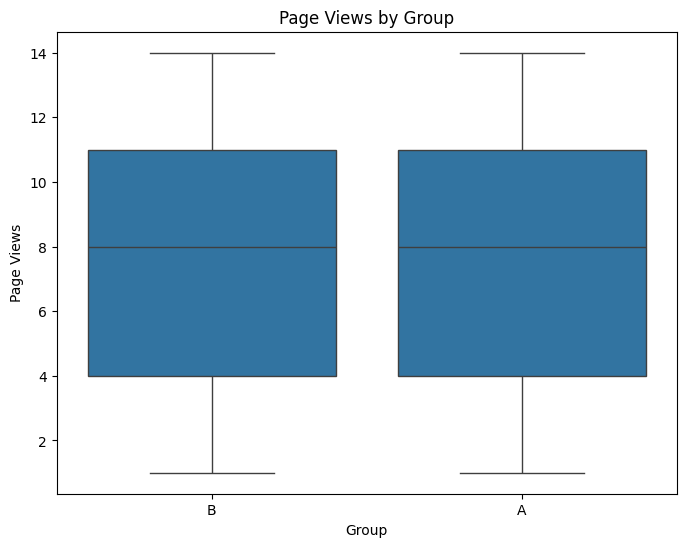

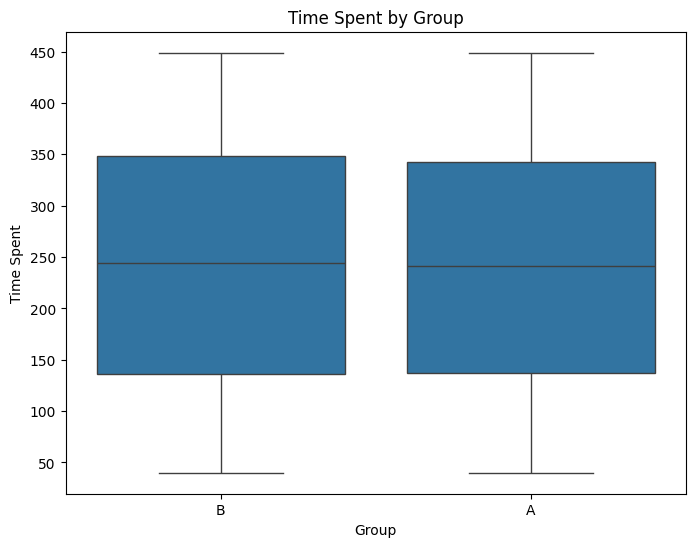

In [17]:
# Visualizations
# 1. Page Views Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Page Views', data=df)
plt.title('Page Views by Group')
plt.show()

# 2. Time Spent Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Time Spent', data=df)
plt.title('Time Spent by Group')
plt.show()



* The Black background (Group B) does not significantly impact page views or time spent, indicating no change in browsing behavior or session duration.

* However, it significantly improves conversion rates, suggesting it positively influences user decision-making and engagement.

* This makes the Black background a low-risk, high-reward change that can be implemented site-wide to boost conversions without affecting other engagement metrics.

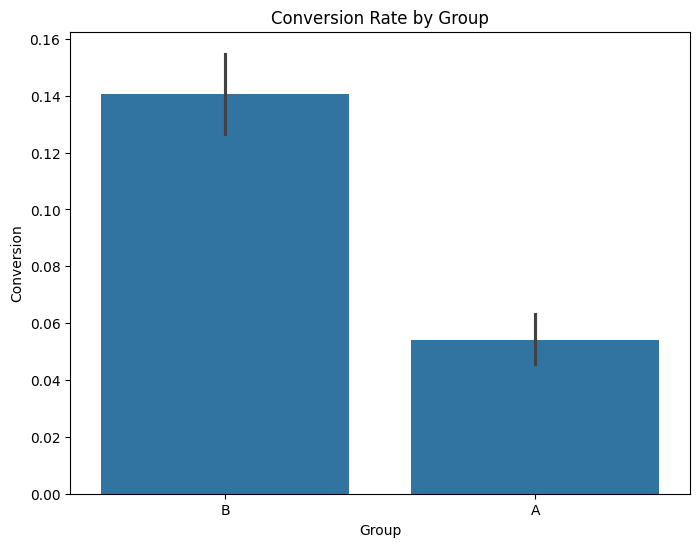

In [18]:
# 3. Conversion Rate by Group
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Conversion', data=df, estimator=np.mean)
plt.title('Conversion Rate by Group')
plt.show()



* Group B (Black background) has a significantly higher conversion rate compared to Group A (White background).

* The Black background positively influences users to complete desired actions, such as purchases or sign-ups.

* This makes the Black background a strong candidate for site-wide implementation to boost conversions.

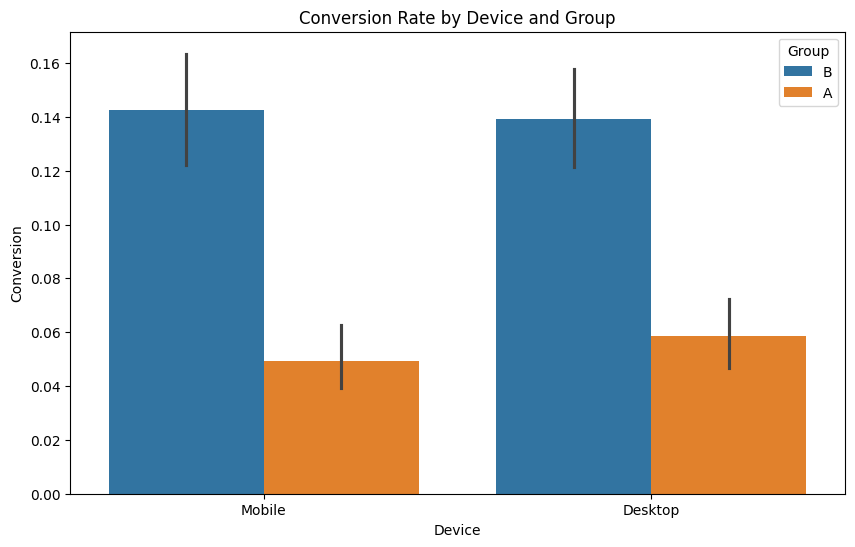

In [19]:
# 4. Device-wise Conversion Rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Device', y='Conversion', hue='Group', data=df, estimator=np.mean)
plt.title('Conversion Rate by Device and Group')
plt.show()



* Higher Conversion for Group B: Group B outperforms Group A in conversion rates across both Mobile and Desktop, indicating the changes made in Group B were effective.

* Consistent Performance Across Devices: Group B shows similar conversion rates on both Mobile and Desktop, while Group A performs slightly better on Desktop but remains much lower overall.

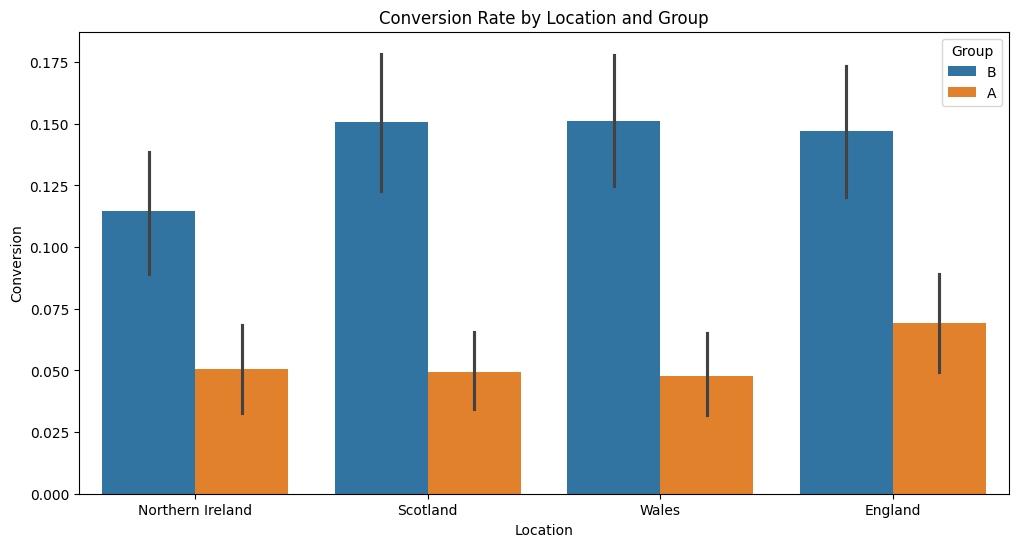

In [20]:
# 5. Location-wise Conversion Rate
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Conversion', hue='Group', data=df, estimator=np.mean)
plt.title('Conversion Rate by Location and Group')
plt.show()



**Group B Consistently Outperforms Group A**: Across all locations (Northern Ireland, Scotland, Wales, and England), Group B has a significantly higher conversion rate compared to Group A.

**Scotland, Wales, and England Have the Highest Conversions for Group B**: These three locations show nearly identical high conversion rates for Group B, suggesting a strong and uniform impact of the tested changes.

**Group A’s Performance is Relatively Stable but Low**: The conversion rate for Group A remains consistently low across all locations, with minor variations, indicating that the changes tested in Group B led to improved conversions.
